In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Loading the dataset
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Gender'>

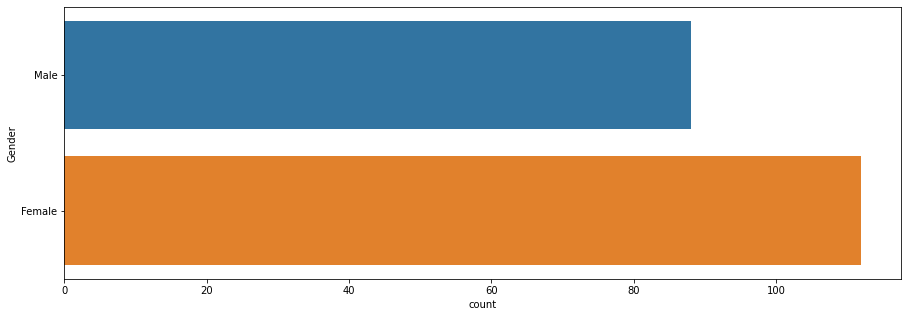

In [48]:
plt.figure(figsize=(15 , 5))
sns.countplot(y='Gender', data=df)

<Figure size 1080x576 with 0 Axes>

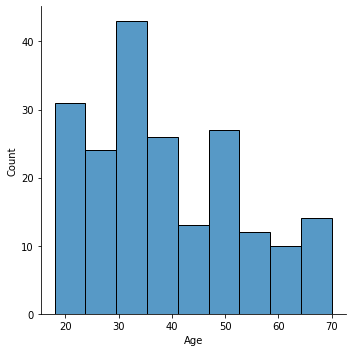

In [51]:
plt.figure(figsize=(15,8))
sns.displot(df.get('Age'), kde=False)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

<Figure size 1080x1080 with 0 Axes>

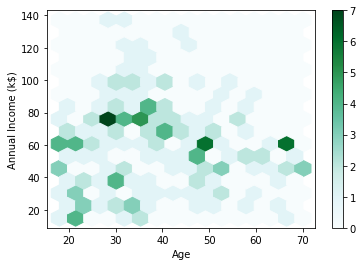

In [59]:
plt.figure(figsize=(15,15))
df.plot.hexbin(x='Age', y='Annual Income (k$)', gridsize=15, sharex=False)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

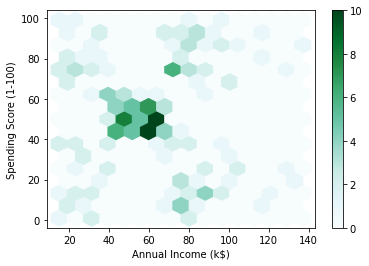

In [60]:
df.plot.hexbin(x='Annual Income (k$)', y='Spending Score (1-100)', gridsize=15, sharex=False)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

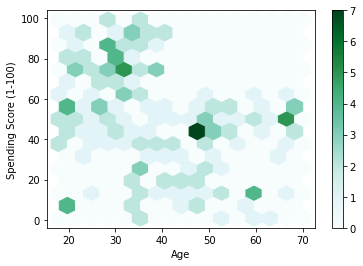

In [61]:
df.plot.hexbin(x='Age', y='Spending Score (1-100)', gridsize=15, sharex=False)

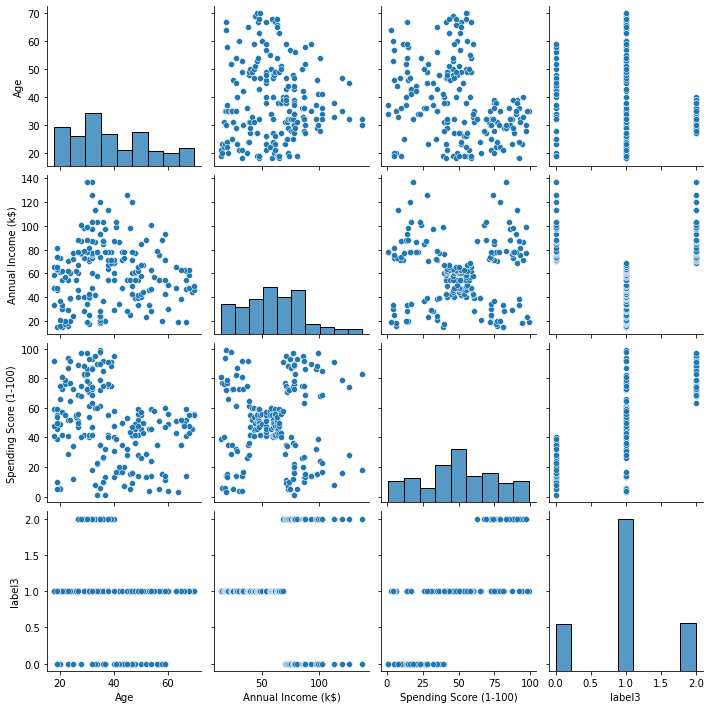

In [62]:
sns.pairplot(df.drop(['CustomerID'], axis=1))

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

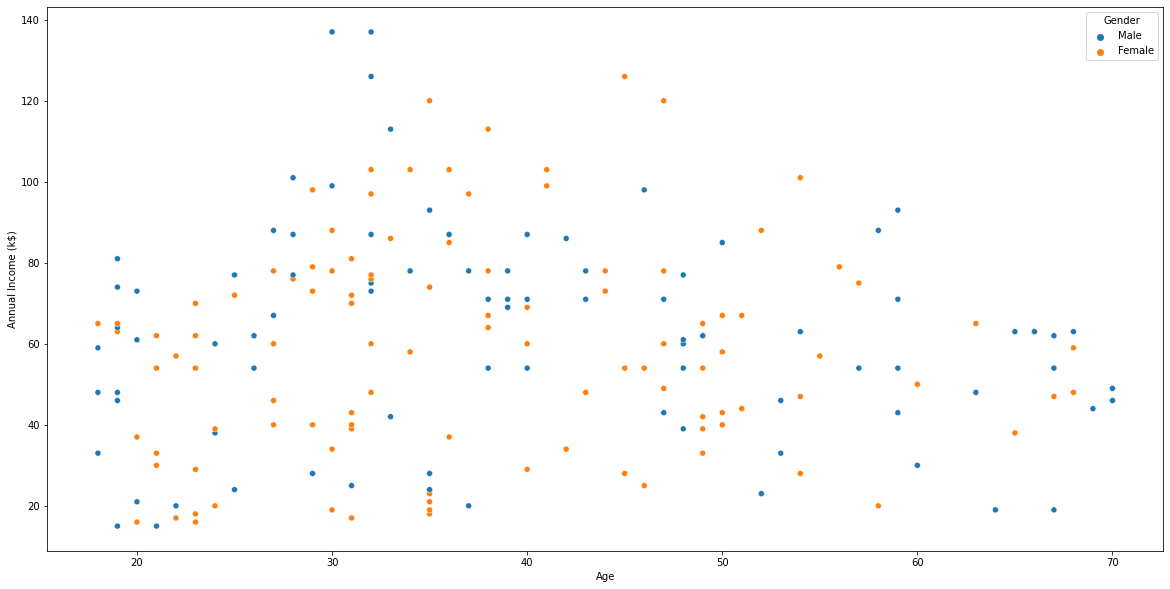

In [63]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

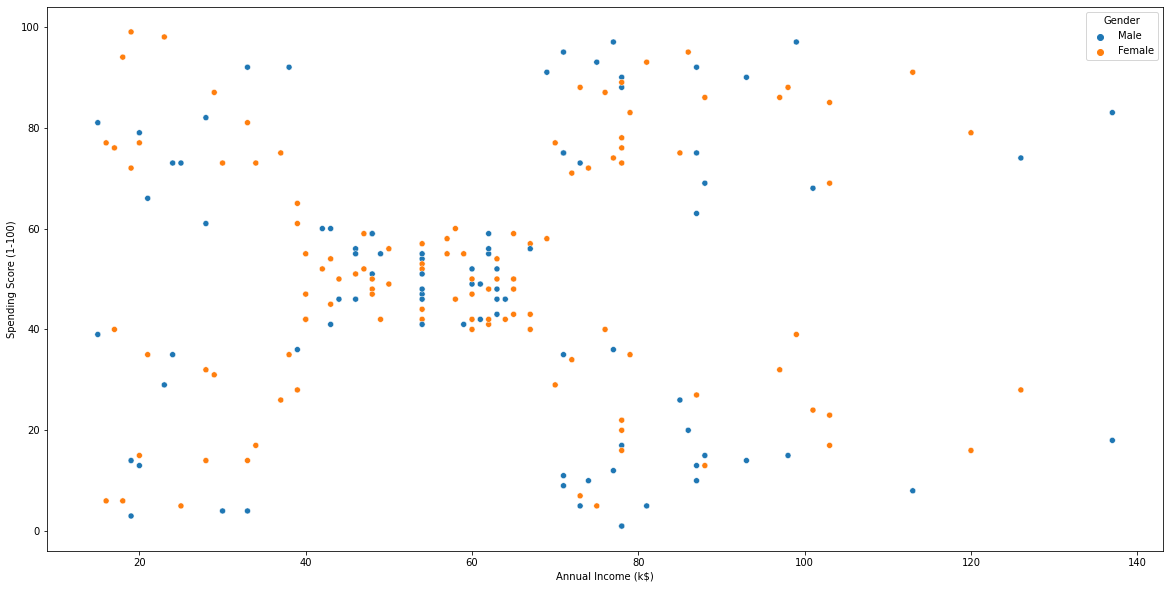

In [64]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")

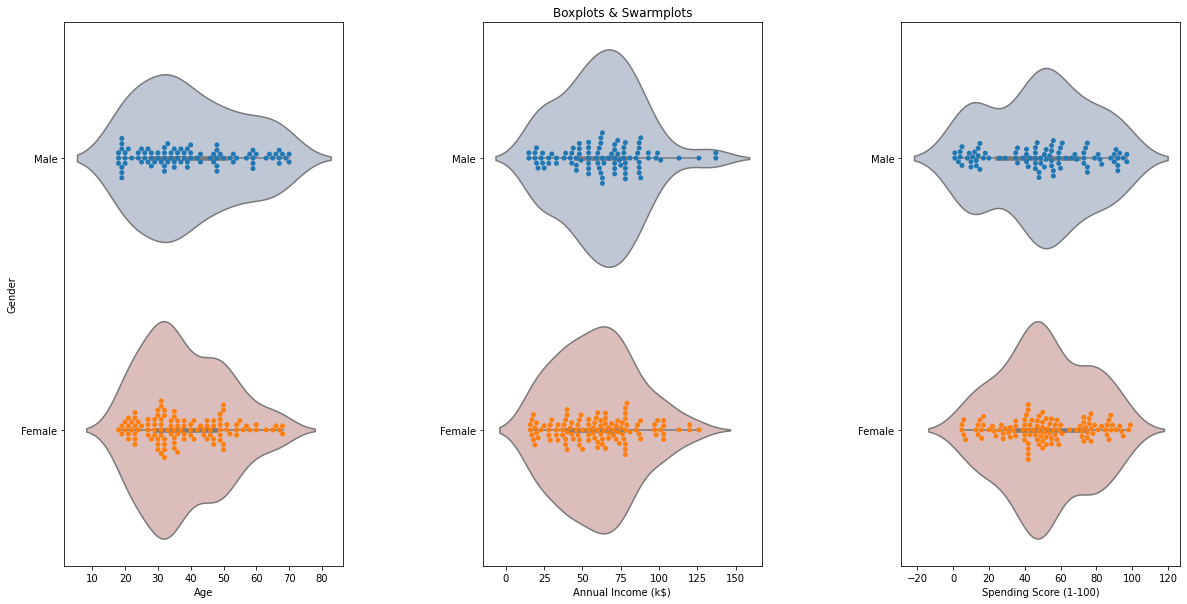

In [65]:
plt.figure(figsize=(20,10))
# Distribution of values in Age , Annual Income and Spending Score according to Gender
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')

In [66]:
X = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']]

In [67]:
#Create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

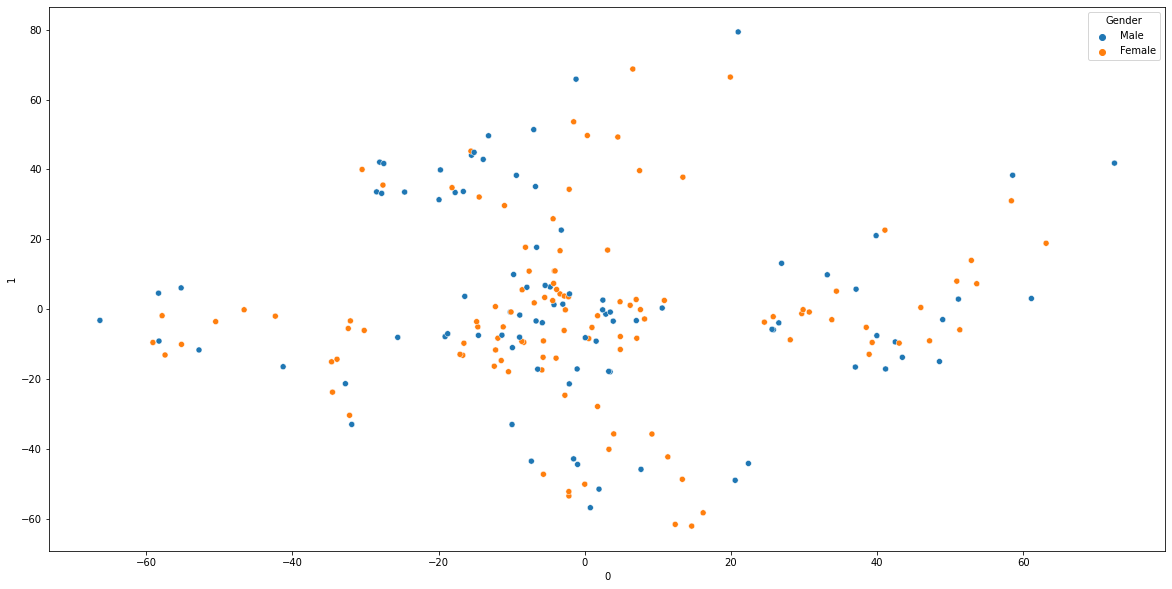

In [69]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.Gender)

In [84]:
# Segmentation using Age , Annual Income and Spending Score
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

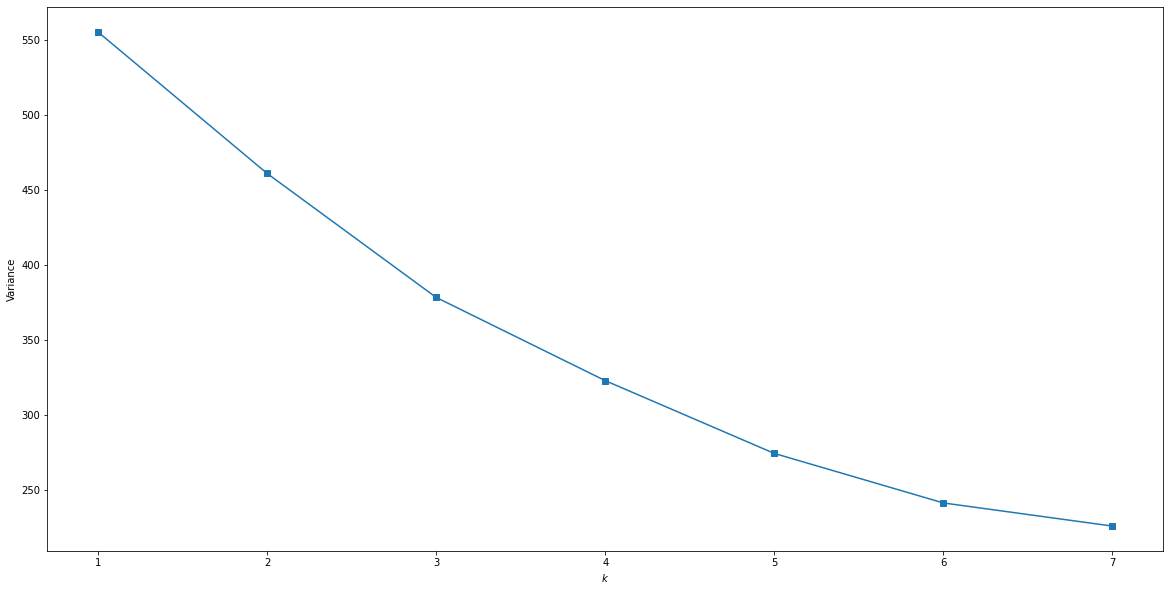

In [85]:
plt.figure(figsize=(20,10))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [116]:
#create KMeans model
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

In [117]:
y = kmeans.fit_predict(X)

In [118]:
pca_df.head()

,0,1
0,-31.870508,-33.001425
1,0.763397,-56.843865
2,-57.408726,-13.122936
3,-2.169896,-53.477905
4,-32.174920,-30.387005


<AxesSubplot:xlabel='0', ylabel='1'>

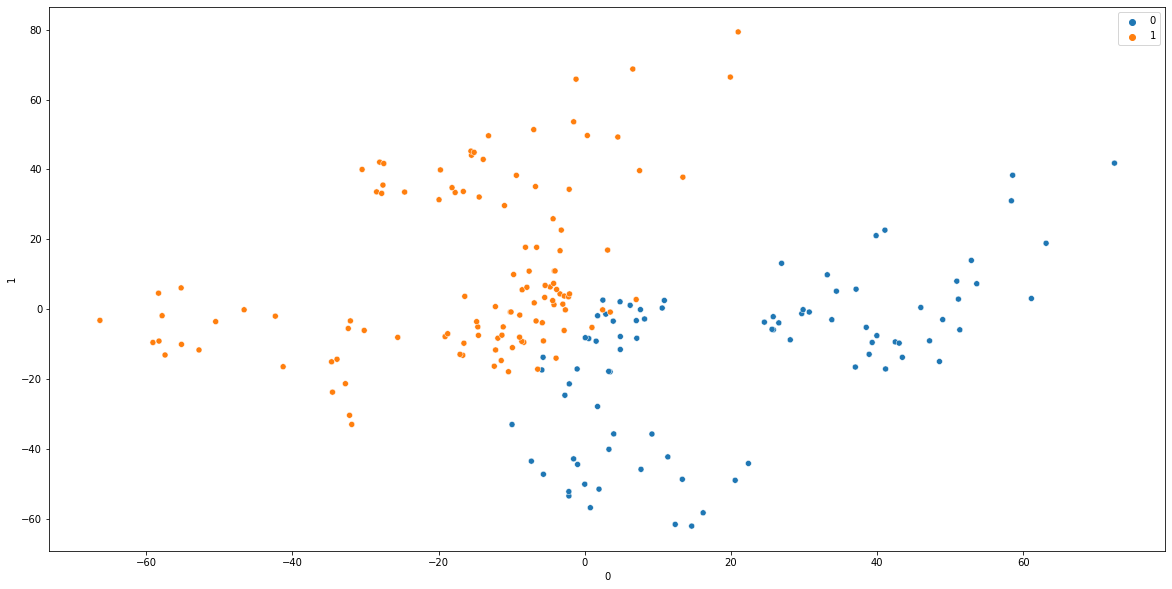

In [119]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

In [120]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([df, y_df], axis=1)

In [121]:
new_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3,Cluster
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,2,1


In [122]:
pca_df

,0,1
0,-31.870508,-33.001425
1,0.763397,-56.843865
2,-57.408726,-13.122936
3,-2.169896,-53.477905
4,-32.174920,-30.387005
...,...,...
195,58.353072,31.016926
196,19.909355,66.446425
197,58.521858,38.343853
198,20.981105,79.375146


In [123]:
import plotly.express as px

In [124]:
fig = px.scatter(pd.concat([new_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster', hover_data=['Gender', 'Age' , 'Annual Income (k$)' ,'Spending Score (1-100)'])
fig.show()

In [99]:
import plotly as py
import plotly.graph_objs as go
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [100]:
# Segmentation using Age , Annual Income and Spending Score
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

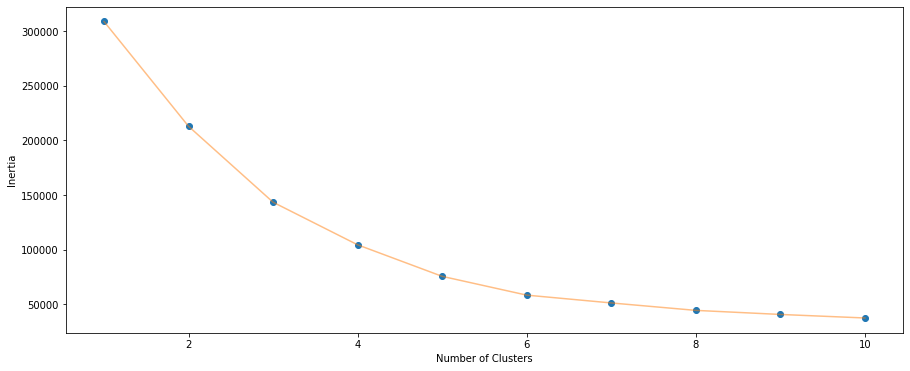

In [101]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

In [102]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [104]:
plt.figure(figsize=(20,20))
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

<Figure size 1440x1440 with 0 Axes>

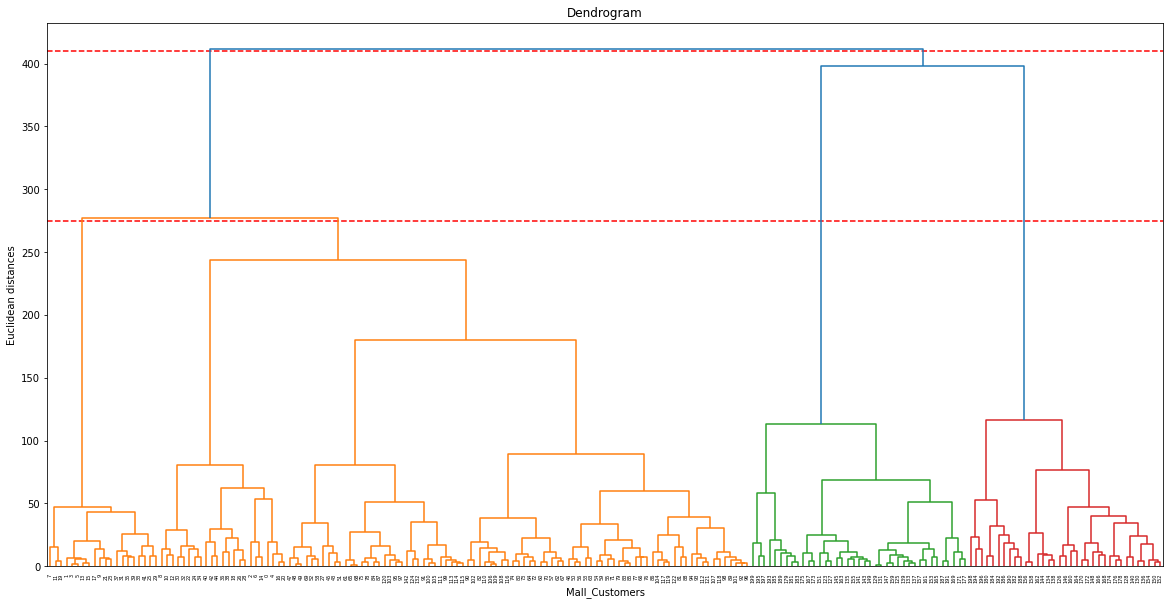

In [105]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title('Dendrogram')
plt.xlabel('Mall_Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=275, color='r', linestyle='--')
plt.axhline(y=410, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [111]:
#Implement model
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 

In [112]:
y_agglo = agglo.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

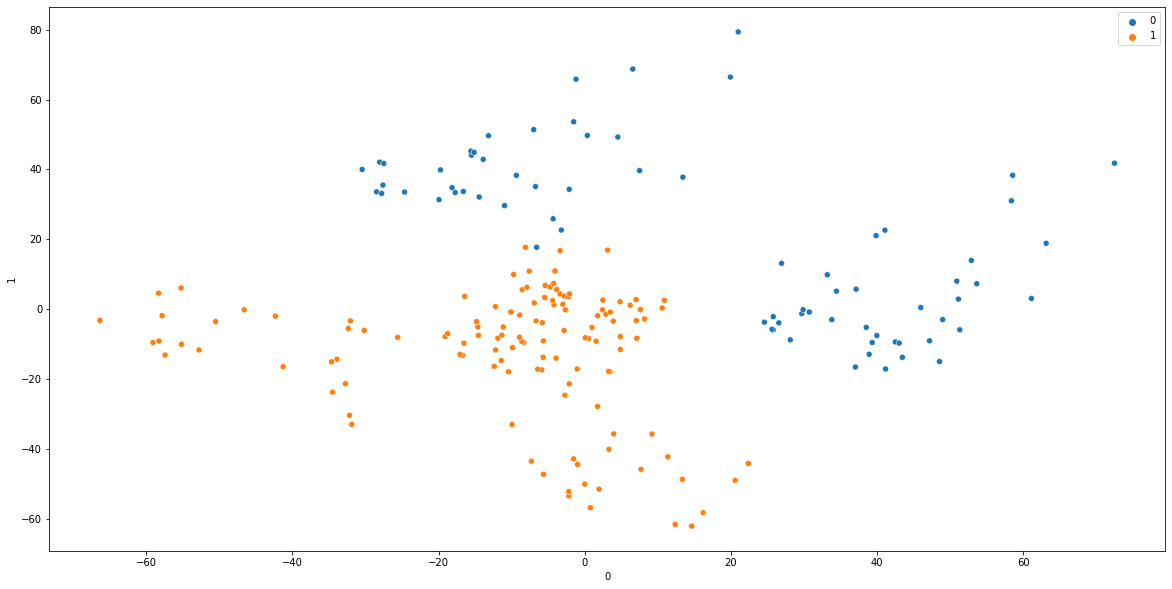

In [113]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y_agglo)

In [114]:
y_a_df = pd.DataFrame(y_agglo, columns=['Cluster (Agglomerative)'])
new_a_df = pd.concat([df, y_a_df], axis=1)

In [125]:
plt.figure(figsize=(20,10))
fig = px.scatter(pd.concat([new_a_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster (Agglomerative)', hover_data=['Gender', 'Age' , 'Annual Income (k$)' ,'Spending Score (1-100)'])
fig.show()

<Figure size 1440x720 with 0 Axes>